In [81]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(10,8)

pd.options.mode.chained_assignment = None 

# Now we need to read in the data
df = pd.read_csv(r'C:\Users\USER\Documents\Emmanuel Project\Spread Sheet File\PortfolioProjects-main\movies.csv')

In [3]:
# Now let's take a look at the data

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [83]:
# The intention of this project is to check the correlation btw other parameter and the gross earning
# We intend to find out the effect of the other vaiables on the gross earning 
# To know which of them affect the gross earning the most


# My guess is that the budget of the movie will higly collerate with the gross earning 
# Lets find out

In [69]:
# Lets check the Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


<Axes: >

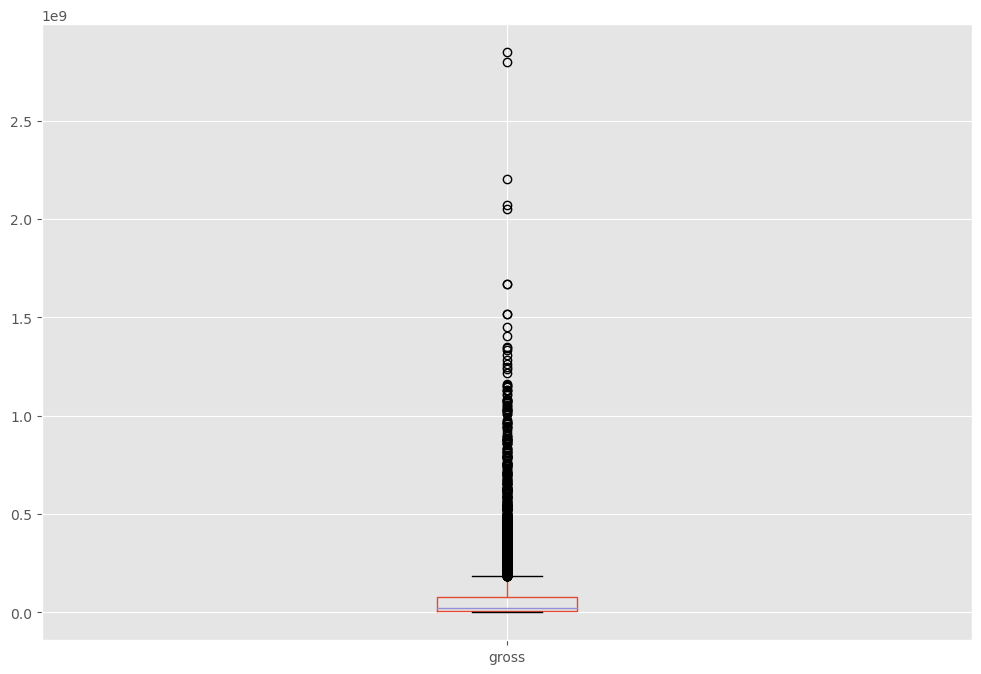

In [70]:
# Are there any Outliers?

df.boxplot(column=['gross'])

In [11]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [12]:
# We discovered that there are missing data in rating, budget and gross column with gross with the hihest value

# Order our Data a little bit to see

df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [42]:
# lets check how many row in the gross column is null
n = 0
for data in df['gross'].isnull():
    if data == True:
        n+=1
print(n)

# another way of doing it
np.sum(df['gross'].isnull())

189


189

In [ ]:
# We have discovered that they are 189 rows without a gross data
# since we are mostly interested in the gross column for our analysis
# we would drop or delete every row without any data in the gross column 

In [539]:
# drop row without any data in the gross column and save to a new dataframe
df2 = df
n=0
for index in df.index:
    if df2['gross'].isnull()[index] == True:
        df2 = df2.drop(index, errors = 'ignore')
        n+=1
        
print('You have deleted {} number of rows with null value in the gross column'.format(n))

You have deleted 189 number of rows with null value in the gross column


In [540]:
# df2 is now the new dataframe we would be working with 7479 rows
df2

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,NaN,3661.0,Prowess Pictures,98.0
7655,Legend of Deification,TV-PG,Animation,2020,"October 1, 2020 (United States)",6.6,1300.0,Teng Cheng,NaN,Guangtao Jiang,China,NaN,240663149.0,Beijing Enlight Pictures,110.0
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,NaN,413378.0,Pryor Entertainment,120.0
7657,Leap,NaN,Drama,2020,"September 25, 2020 (United States)",6.7,903.0,Peter Ho-Sun Chan,Ji Zhang,Gong Li,China,NaN,25818882.0,NaN,135.0


In [121]:
# now lets drop duplicate if any

df2.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,NaN,3661.0,Prowess Pictures,98.0
7655,Legend of Deification,TV-PG,Animation,2020,"October 1, 2020 (United States)",6.6,1300.0,Teng Cheng,NaN,Guangtao Jiang,China,NaN,240663149.0,Beijing Enlight Pictures,110.0
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,NaN,413378.0,Pryor Entertainment,120.0
7657,Leap,NaN,Drama,2020,"September 25, 2020 (United States)",6.7,903.0,Peter Ho-Sun Chan,Ji Zhang,Gong Li,China,NaN,25818882.0,NaN,135.0


In [122]:
# Order our Data a little bit to see

df2.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,NaN,1.400000e+03,British Broadcasting Corporation (BBC),103.0
7625,The Untold Story,NaN,Comedy,2019,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,NaN,7.900000e+02,Visual Arts Entertainment,104.0
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,NaN,6.820000e+02,Roxwell Films,93.0
2417,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000.0,5.960000e+02,DENTSU Music And Entertainment,134.0


In [123]:
# check out the correlation between the column with numeric values
# Correlation Matrix between all numeric columns

df2.corr(numeric_only = True, method ='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.091821,0.215740,0.327781,0.257486,0.114706
score,0.091821,1.000000,0.413096,0.071792,0.186258,0.397321
votes,0.215740,0.413096,1.000000,0.440021,0.630757,0.309536
budget,0.327781,0.071792,0.440021,1.000000,0.740395,0.318595
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.114706,0.397321,0.309536,0.318595,0.245216,1.000000


In [78]:
df2.corr(numeric_only = True, method ='kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.063569,0.319743,0.220991,0.200618,0.091032
score,0.063569,1.000000,0.301718,-0.006518,0.086046,0.282310
votes,0.319743,0.301718,1.000000,0.346228,0.548899,0.190631
budget,0.220991,-0.006518,0.346228,1.000000,0.512637,0.230879
gross,0.200618,0.086046,0.548899,0.512637,1.000000,0.168933
runtime,0.091032,0.282310,0.190631,0.230879,0.168933,1.000000


In [79]:
df2.corr(numeric_only = True, method ='spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.093274,0.454881,0.313199,0.293084,0.134219
score,0.093274,1.000000,0.430797,-0.010133,0.126116,0.398195
votes,0.454881,0.430797,1.000000,0.493404,0.742050,0.279828
budget,0.313199,-0.010133,0.493404,1.000000,0.693670,0.330276
gross,0.293084,0.126116,0.742050,0.693670,1.000000,0.246243
runtime,0.134219,0.398195,0.279828,0.330276,0.246243,1.000000


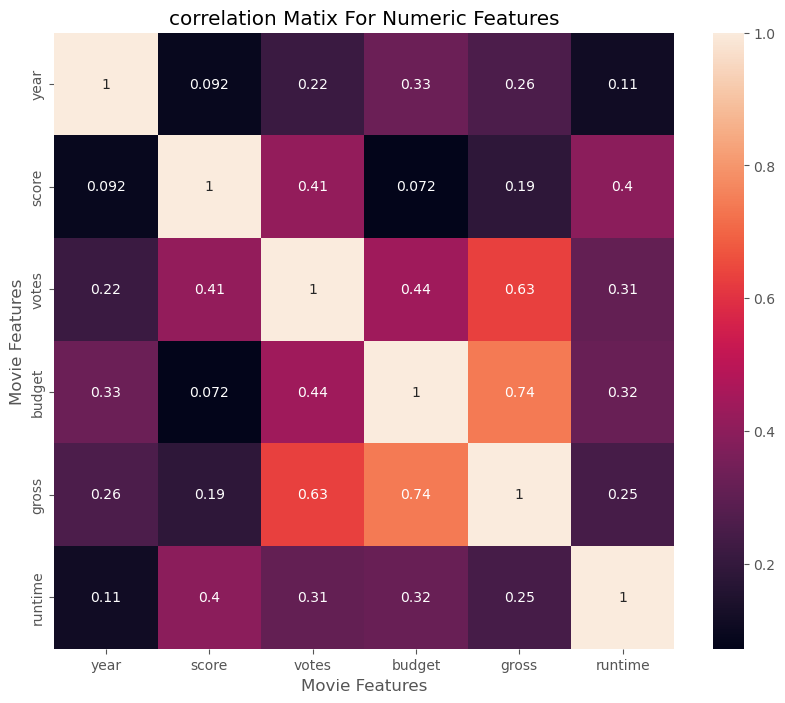

In [84]:
# lets plot a correlation heatmap to visualize

correlation_matix = df2.corr(numeric_only=True)

sns.heatmap(correlation_matix, annot=True)

plt.title('correlation Matix For Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

<Axes: xlabel='gross', ylabel='budget'>

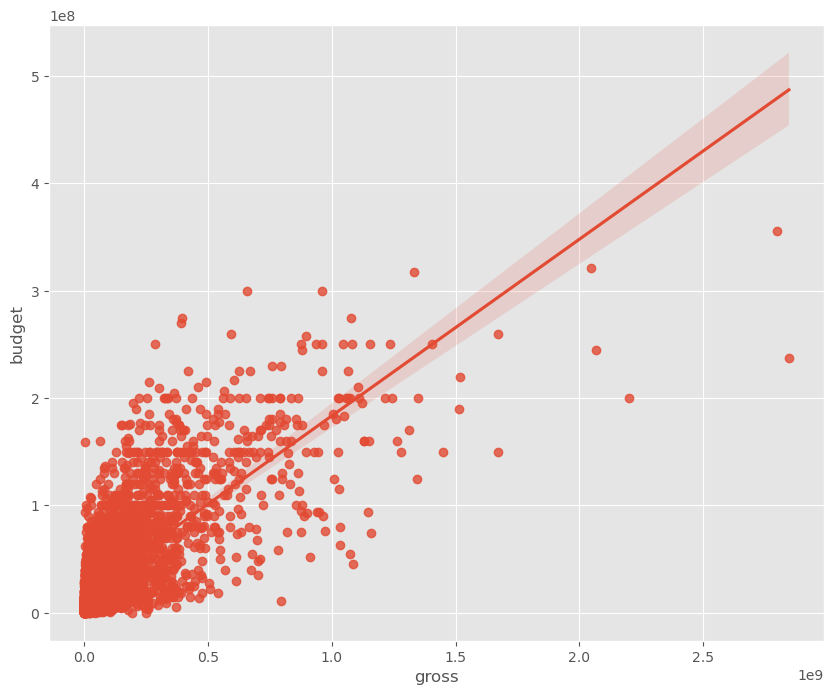

In [86]:
# from the above analysis, we can can see that the votes and budget are highly correlated
# let show that in a regression plot 

sns.regplot(x='gross', y='budget', data=df2)

<Axes: xlabel='gross', ylabel='votes'>

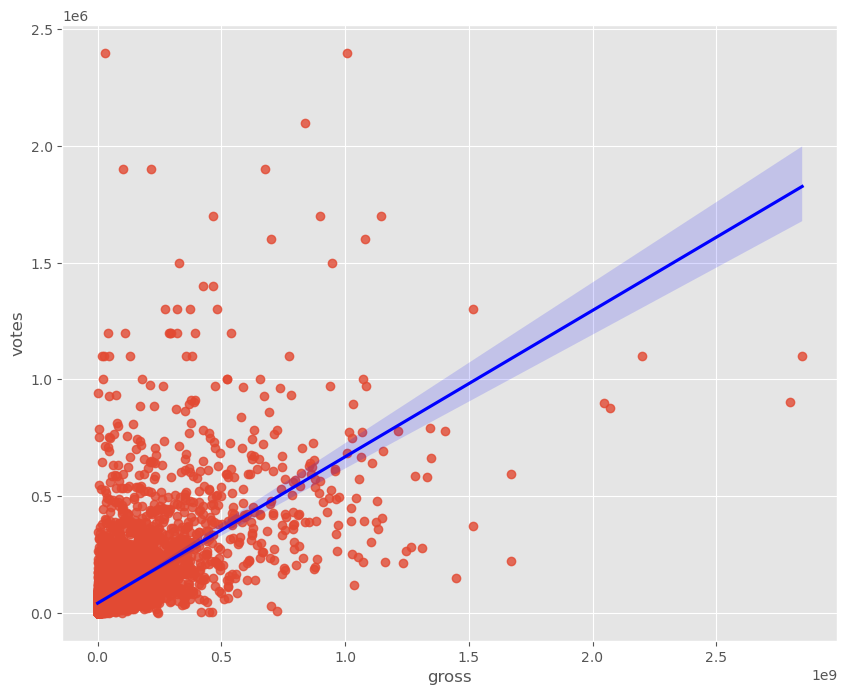

In [95]:
sns.regplot(x='gross', y='votes', data=df2, line_kws={'color': 'blue'})

In [ ]:
# we can see how both the budget and votes correlate with the gross earnings 

# now let get to see how the n0n numeric values or features correlate with the gross
# Because the data type is not numeric, we would have to find a way to convert them 

In [321]:
# Let's reset our index first

In [541]:

df2.reset_index(drop=True, inplace=True)        

df2

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7474,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,NaN,3661.0,Prowess Pictures,98.0
7475,Legend of Deification,TV-PG,Animation,2020,"October 1, 2020 (United States)",6.6,1300.0,Teng Cheng,NaN,Guangtao Jiang,China,NaN,240663149.0,Beijing Enlight Pictures,110.0
7476,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,NaN,413378.0,Pryor Entertainment,120.0
7477,Leap,NaN,Drama,2020,"September 25, 2020 (United States)",6.7,903.0,Peter Ho-Sun Chan,Ji Zhang,Gong Li,China,NaN,25818882.0,NaN,135.0


In [527]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df2_numerized = df2

df2_numerized = df2_numerized.apply(lambda x: x.factorize()[0])

df2_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1
2,2,1,2,0,2,2,2,2,2,2,1,2,2,2,2
3,3,1,3,0,1,3,3,3,3,3,1,3,3,3,3
4,4,0,3,0,3,4,4,4,4,4,1,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7474,7327,0,6,40,3317,19,44,2842,4391,2688,1,-1,7467,2273,4
7475,7328,9,9,40,3318,14,57,2843,-1,2689,26,-1,7468,2274,48
7476,7329,6,3,40,3319,27,867,2844,4392,2690,1,-1,7469,2275,59
7477,7330,-1,0,40,3320,17,868,1426,4393,810,26,-1,7470,-1,92


In [544]:
# Use the copy function to ensure that the new data frome does not poin to the same object
df2_numerized2 = df2.copy()

In [545]:
# Using .cat.codes - this assigns a random numeric value for each unique categorical value 

#check this code agin
#df2_numerized2 = df2_pass

for col_name in df2_numerized2.columns:
    if df2_numerized2[col_name].dtype == 'object':
        df2_numerized2[col_name] = df2_numerized2[col_name].astype('category')
        #d = dict(enumerate(df2[col_name].cat.categories))
        df2_numerized2[col_name] = df2_numerized2[col_name].cat.codes
        #df2[col_name] = df2[col_name].map(d)
        #df2[col_name] = df2[col_name].astype('object')
df2_numerized2

#check this code again

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6428,6,6,1980,1669,8.4,927000.0,2500,3890,994,52,19000000.0,46998772.0,2213,146.0
1,5426,6,1,1980,1460,5.8,65000.0,2189,1578,313,53,4500000.0,58853106.0,701,104.0
2,5006,4,0,1980,1733,8.7,1200000.0,1072,2485,1666,53,18000000.0,538375067.0,1470,124.0
3,280,4,4,1980,1460,7.7,221000.0,1260,1936,2146,53,3500000.0,83453539.0,1728,88.0
4,1001,6,4,1980,1509,7.3,108000.0,1019,507,394,53,6000000.0,39846344.0,1695,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7474,6321,6,5,2020,91,5.4,2400.0,2430,3760,2336,53,NaN,3661.0,1817,98.0
7475,3105,9,2,2020,2748,6.6,1300.0,2620,-1,885,8,NaN,240663149.0,360,110.0
7476,6851,5,4,2020,1847,5.0,294.0,2425,3753,2276,53,NaN,413378.0,1819,120.0
7477,3088,-1,6,2020,3205,6.7,903.0,2112,1932,870,8,NaN,25818882.0,-1,135.0


In [453]:
# let check out the correlation of the nemerized data frame 2
df2_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,0.143094,0.031953,0.965203,0.959315,-0.041478,0.284439,0.743578,0.801538,0.729960,0.152811,0.272487,0.965254,0.595797,0.045565
rating,0.143094,1.000000,-0.081685,0.156473,0.145223,0.013380,0.099046,0.087490,0.105165,0.097033,0.014204,0.191459,0.153166,-0.024672,0.036474
genre,0.031953,-0.081685,1.000000,0.033758,0.032257,-0.006677,0.021869,0.043267,0.028524,0.035276,-0.021250,0.061358,0.034227,0.007297,0.003410
year,0.965203,0.156473,0.033758,1.000000,0.993563,-0.039538,0.309352,0.768131,0.821667,0.754802,0.149644,0.297366,0.998875,0.605164,0.047870
released,0.959315,0.145223,0.032257,0.993563,1.000000,-0.040269,0.296267,0.769235,0.816563,0.754347,0.156932,0.281089,0.994050,0.612206,0.044341
score,-0.041478,0.013380,-0.006677,-0.039538,-0.040269,1.000000,-0.004147,-0.020826,-0.030289,-0.003660,0.035414,-0.011846,-0.038015,-0.023062,0.032825
votes,0.284439,0.099046,0.021869,0.309352,0.296267,-0.004147,1.000000,0.182316,0.217268,0.170507,-0.045578,0.394921,0.296289,0.003747,0.109896
director,0.743578,0.087490,0.043267,0.768131,0.769235,-0.020826,0.182316,1.000000,0.746280,0.680895,0.165335,0.098292,0.770307,0.555382,-0.017851
writer,0.801538,0.105165,0.028524,0.821667,0.816563,-0.030289,0.217268,0.746280,1.000000,0.673078,0.170695,0.180681,0.822181,0.547618,0.028277
star,0.729960,0.097033,0.035276,0.754802,0.754347,-0.003660,0.170507,0.680895,0.673078,1.000000,0.191189,0.101262,0.756032,0.532684,0.031346


In [439]:
# Lets check our the correlation 

df2_numerized2.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.006091,0.017885,0.007404,-0.011033,0.015473,0.011429,0.009092,0.008008,0.007278,-0.012027,0.023630,0.005557,0.008155,0.009142
rating,-0.006091,1.000000,0.087325,0.012776,0.022026,0.002766,0.028082,0.014723,-0.006793,0.004774,0.066465,-0.187347,-0.107339,-0.052477,0.059870
genre,0.017885,0.087325,1.000000,-0.082252,0.026804,0.046093,-0.149289,-0.016412,0.008231,-0.002322,-0.033283,-0.363257,-0.243059,-0.074570,-0.041023
year,0.007404,0.012776,-0.082252,1.000000,0.002465,0.091821,0.215740,-0.019116,-0.008780,-0.032319,-0.084488,0.327781,0.257486,-0.014883,0.114706
released,-0.011033,0.022026,0.026804,0.002465,1.000000,0.044301,0.018043,-0.002315,-0.002699,0.015812,-0.020083,0.018319,0.002341,-0.007031,0.000605
score,0.015473,0.002766,0.046093,0.091821,0.044301,1.000000,0.413096,0.008810,0.018648,0.000310,-0.129474,0.071792,0.186258,-0.001107,0.397321
votes,0.011429,0.028082,-0.149289,0.215740,0.018043,0.413096,1.000000,0.000919,0.000972,-0.021274,0.069934,0.440021,0.630757,0.131020,0.309536
director,0.009092,0.014723,-0.016412,-0.019116,-0.002315,0.008810,0.000919,1.000000,0.297601,0.036794,0.014435,-0.009593,-0.014490,0.004213,0.016942
writer,0.008008,-0.006793,0.008231,-0.008780,-0.002699,0.018648,0.000972,0.297601,1.000000,0.023374,0.011871,-0.039188,-0.023574,0.005972,-0.002816
star,0.007278,0.004774,-0.002322,-0.032319,0.015812,0.000310,-0.021274,0.036794,0.023374,1.000000,-0.016192,-0.020515,-0.002602,0.007518,0.009227


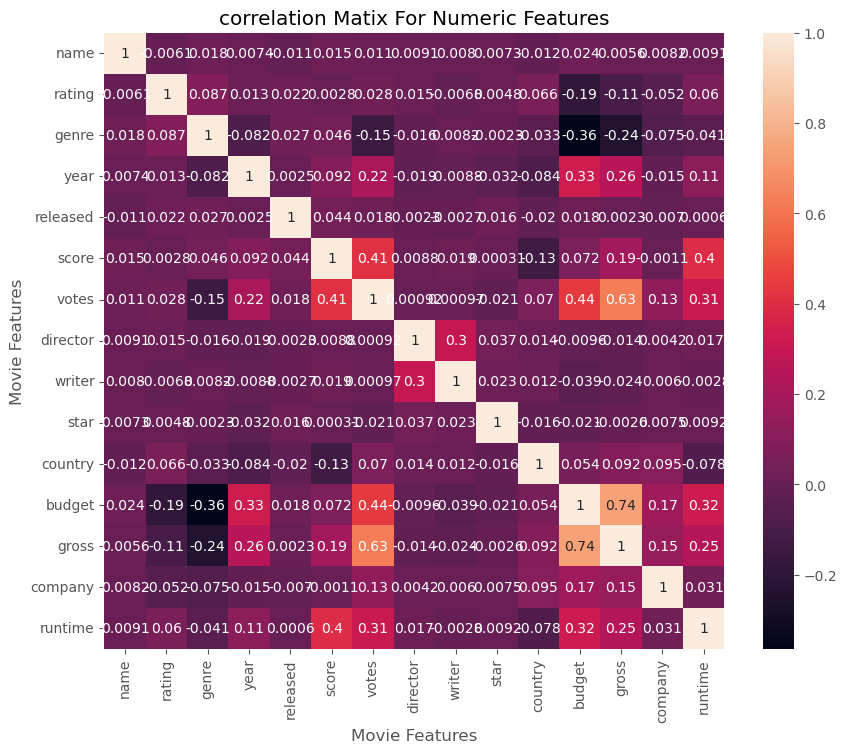

In [440]:
# Now lets plot the heatmap

correlation_matix = df2_numerized2.corr(numeric_only=True, method='pearson')

sns.heatmap(correlation_matix, annot=True)

plt.title('correlation Matix For Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [446]:
# Lets view the correlaion btw each column and the other column using the .unstack()

correlation_mat = df2_numerized.corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name     name        1.000000
         rating      0.143094
         genre       0.031953
         year        0.965203
         released    0.959315
                       ...   
runtime  country     0.117973
         budget      0.111958
         gross       0.044512
         company     0.001333
         runtime     1.000000
Length: 225, dtype: float64


In [447]:
# lets sort the correlation pair so we can later view the correlation pair greater than 0.5
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

budget   company   -0.095790
company  budget    -0.095790
genre    rating    -0.081685
rating   genre     -0.081685
budget   country   -0.077656
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64


In [448]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs) 

star     company     0.532684
company  star        0.532684
writer   company     0.547618
company  writer      0.547618
         director    0.555382
                       ...   
year     year        1.000000
genre    genre       1.000000
rating   rating      1.000000
company  company     1.000000
runtime  runtime     1.000000
Length: 71, dtype: float64


In [550]:
# Looking at the top 15 companies by gross revenue

CompanyGrossSum = df2.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [559]:
# lets also Look at the top 15 companies by gross revenue and the year

CompanyyearGrossSum = df2.groupby(['company', 'year'])[['gross']].sum()
CompanyyearGrossSum = CompanyyearGrossSum.sort_values('gross', ascending = False)[:15]

# to show the sum of gross in the year without the decimal 
CompanyyearGrossSum = CompanyyearGrossSum['gross'].astype('int64')

CompanyyearGrossSum

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2010    3300479986
                       2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2006    2934631933
                       2019    2932757449
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
Columbia Pictures      2011    2738363306
Name: gross, dtype: int64

<Axes: title={'center': 'Budget vs Gross Earnings'}, xlabel='gross', ylabel='budget'>

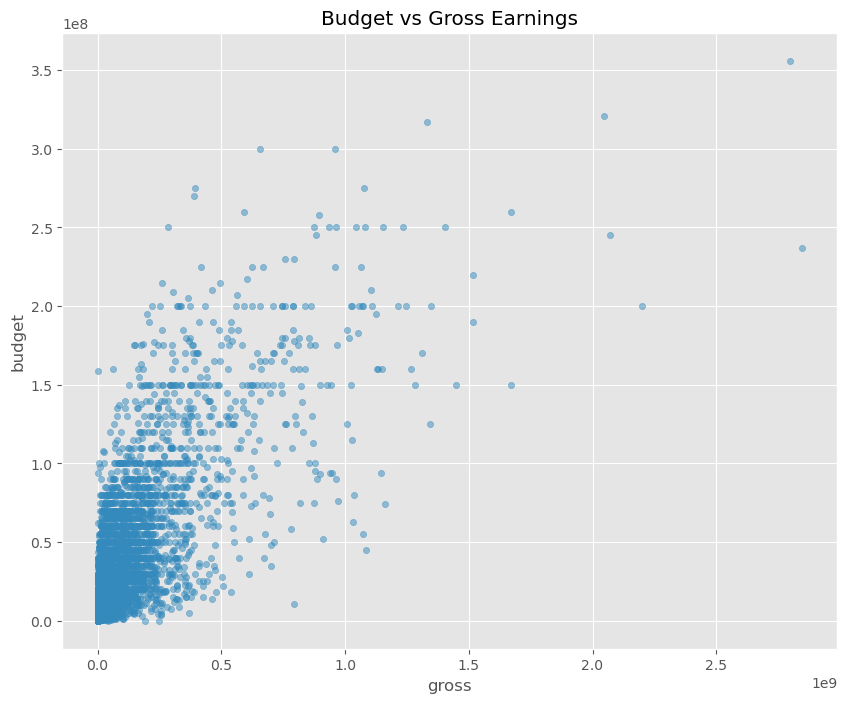

In [563]:
# looking at a scattered plot of the highest correlation btweeen budget and gross earning
df2.plot(kind='scatter', x='gross', y='budget', title= 'Budget vs Gross Earnings', alpha=0.5 )

<Axes: xlabel='rating', ylabel='gross'>

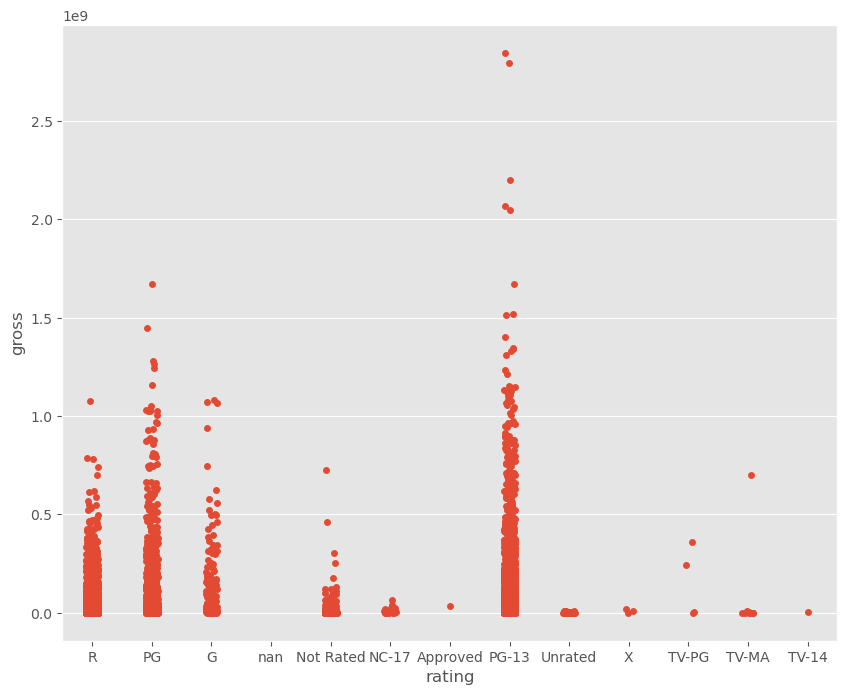

In [568]:
# we can also check the rating in relation to the gross 
sns.stripplot(x="rating", y="gross", data=df2)

In [ ]:
# we have discovered that budget has the highest correlation to gross 

In [496]:
#from sklearn.preprocessing import LabelEncoder